In [181]:
# %matplotlib inline
import matplotlib
matplotlib.use("Agg")
 
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
from random import sample, randint, shuffle
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import argparse
import random
import pickle
import cv2
from PIL import Image
import os

In [85]:
data = []
labels = []

In [86]:
imagePaths = sorted(list(paths.list_images('images/')))
random.seed(42)
random.shuffle(imagePaths)

In [87]:
imagePaths[:5]

['images/bulbasaur/00000192.png',
 'images/mewtwo/00000055.jpg',
 'images/squirtle/00000088.jpg',
 'images/pikachu/00000148.jpg',
 'images/charmander/00000169.png']

## Resize, Flatten and append to data,label lists
### Flattening: 32x32x3 = 3072

In [88]:
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    # flatten the image into 32x32x3=3072
    image = cv2.resize(image, (32, 32)).flatten()
    data.append(image)
 
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

In [6]:
data[:1][0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [7]:
len(data)

960

## Scale the raw pixel intensities to the range [0, 1] from [0, 255]

In [8]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

## Train, Test split of 75, 25

In [9]:
(trainX, testX, trainY, testY) = train_test_split(data,
    labels, test_size=0.25, random_state=42)

In [10]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [31]:
testY

array([[0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [12]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="sigmoid"))
model.add(Dense(512, activation="sigmoid")) 
model.add(Dense(256, activation="sigmoid")) 
# model.add(Dense(128, activation="sigmoid")) 
model.add(Dense(5, activation="softmax")) 

In [13]:
INIT_LR = 0.1
EPOCHS = 90

print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] training network...


In [14]:
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=EPOCHS, batch_size=5)

Train on 720 samples, validate on 240 samples
Epoch 1/90
720/720 [==============================] - 10s 14ms/step - loss: 1.8375 - acc: 0.2208 - val_loss: 1.6405 - val_acc: 0.1958
Epoch 2/90
720/720 [==============================] - 9s 12ms/step - loss: 1.6152 - acc: 0.2542 - val_loss: 1.6100 - val_acc: 0.2083
Epoch 3/90
720/720 [==============================] - 7s 10ms/step - loss: 1.5942 - acc: 0.2625 - val_loss: 1.5589 - val_acc: 0.2625
Epoch 4/90
720/720 [==============================] - 6s 9ms/step - loss: 1.4866 - acc: 0.2958 - val_loss: 1.3742 - val_acc: 0.3583
Epoch 5/90
720/720 [==============================] - 6s 8ms/step - loss: 1.2630 - acc: 0.3681 - val_loss: 1.5658 - val_acc: 0.3542
Epoch 6/90
720/720 [==============================] - 6s 8ms/step - loss: 1.2031 - acc: 0.3861 - val_loss: 1.2192 - val_acc: 0.3792
Epoch 7/90
720/720 [==============================] - 6s 9ms/step - loss: 1.1339 - acc: 0.4403 - val_loss: 1.1503 - val_acc: 0.4417
Epoch 8/90
720/720 [======

720/720 [==============================] - 5s 7ms/step - loss: 0.0570 - acc: 0.9847 - val_loss: 0.6706 - val_acc: 0.8333
Epoch 63/90
720/720 [==============================] - 5s 7ms/step - loss: 0.0627 - acc: 0.9806 - val_loss: 0.5955 - val_acc: 0.8792
Epoch 64/90
720/720 [==============================] - 5s 7ms/step - loss: 0.0792 - acc: 0.9792 - val_loss: 0.6119 - val_acc: 0.8750
Epoch 65/90
720/720 [==============================] - 5s 7ms/step - loss: 0.1226 - acc: 0.9681 - val_loss: 1.1177 - val_acc: 0.6458
Epoch 66/90
720/720 [==============================] - 5s 7ms/step - loss: 0.0826 - acc: 0.9736 - val_loss: 0.5721 - val_acc: 0.8625
Epoch 67/90
720/720 [==============================] - 5s 7ms/step - loss: 0.0556 - acc: 0.9847 - val_loss: 0.9194 - val_acc: 0.7917
Epoch 68/90
720/720 [==============================] - 5s 7ms/step - loss: 0.0553 - acc: 0.9861 - val_loss: 0.5961 - val_acc: 0.8667
Epoch 69/90
720/720 [==============================] - 5s 7ms/step - loss: 0.0781

In [15]:
# H.history['val_acc'][-4]
observation_list = [EPOCHS,INIT_LR, H.history['loss'][-4], H.history['val_loss'][-4], H.history['acc'][-4], H.history['val_acc'][-4]]
observation_list
with open('./observations/observation_model.txt', 'a') as file_out:
    file_out.write(str(observation_list) + '\n')

In [278]:
labels_index = {0 : 'bulbasaur' ,
                1 : 'charmander' , 
                2 : 'mewto' , 
                3 : 'pikachu' , 
                4 : 'squirlte'}

In [ ]:
nn_pred = model.predict_classes(testX, batch_size = 32)

In [ ]:
predY = model.predict(testX)

def pretty_cm(predY, testY, labels):
    cm = metrics.confusion_matrix(predY.argmax(axis=1), testY.argmax(axis=1))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'BuGn_r')
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('Actual label')
    ax.set_title('Accuracy: {0}'.format(metrics.accuracy_score(testY, predY)), size = 15) 
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)

In [ ]:
pretty_cm(predY,testY,labels_index))

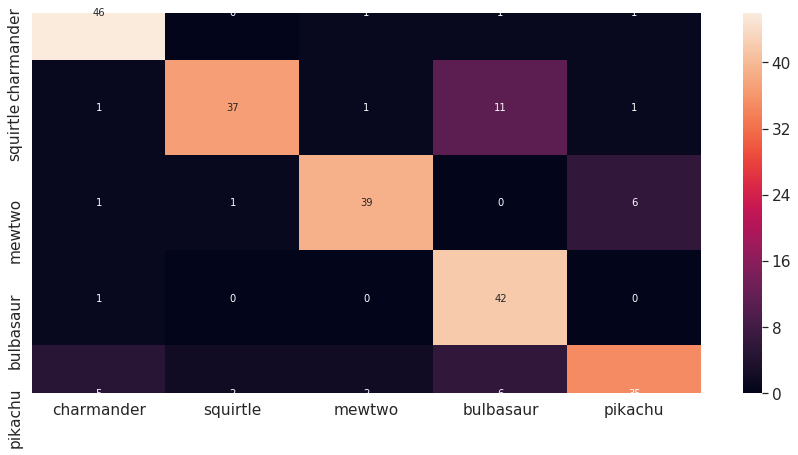

In [109]:

# predY = lb.fit_transform(predY)
# confusion_matrix(testY , predY)
# predY

# np.unique(predY.argmax(axis=1))

cm = confusion_matrix(testY.argmax(axis=1),predY.argmax(axis=1))

plt.figure(figsize = (15,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 10},xticklabels=labels_index,yticklabels=labels_index)# font size

# df_cm
# label

### From the above plot, we can say that, 'at times' the model predicts squirtle as bulbasaur. Same with Mewto and Pikachu, Bulbasaur and Pikcahu.

## CNN


### Conv2D( number_of_filters, (size_of_filter) )

In [120]:
out = open('./observations/observation.csv' , 'w')
headers = 'EPOCH,INITIAL LEARNING RATE,BATCH SIZE,LOSS,VAL_LOSS,ACCURACY,VAL_ACC\n'
out.write(headers)

70

In [111]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

In [112]:
class SymNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1

		# if we are using "channels first", update the input shape
		# and channels dimension
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1
        
        # CONV => RELU => POOL layer set
		model.add(Conv2D(32, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))
        
        # (CONV => RELU) * 2 => POOL layer set
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))    
        
        # first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(512))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))
        
		# softmax classifier
		model.add(Dense(5))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model

In [113]:
# class SymNet:
# 	@staticmethod
# 	def build(width, height, depth, classes):
# 		# initialize the model along with the input shape to be
# 		# "channels last" and the channels dimension itself
# 		model = Sequential()
# 		inputShape = (height, width, depth)
# 		chanDim = -1

# 		# if we are using "channels first", update the input shape
# 		# and channels dimension
# 		if K.image_data_format() == "channels_first":
# 			inputShape = (depth, height, width)
# 			chanDim = 1
        
#         # CONV => RELU => POOL layer set
# 		model.add(Conv2D(64, (3, 3), padding="same",
# 			input_shape=inputShape))
# 		model.add(Activation("relu"))
# 		model.add(BatchNormalization(axis=chanDim))
# 		model.add(MaxPooling2D(pool_size=(2, 2)))
# 		model.add(Dropout(0.25))
        
#         # (CONV => RELU) * 2 => POOL layer set
# 		model.add(Conv2D(128, (3, 3), padding="same"))
# 		model.add(Activation("relu"))
# 		model.add(BatchNormalization(axis=chanDim))
# 		model.add(Conv2D(64, (3, 3), padding="same"))
# 		model.add(Activation("relu"))
# 		model.add(BatchNormalization(axis=chanDim))
# 		model.add(MaxPooling2D(pool_size=(2, 2)))
# 		model.add(Dropout(0.25))    
        
# 		model.add(Conv2D(128, (3, 3), padding="same"))
# 		model.add(Activation("relu"))
# 		model.add(BatchNormalization(axis=chanDim))
# 		model.add(Conv2D(64, (3, 3), padding="same"))
# 		model.add(Activation("relu"))
# 		model.add(BatchNormalization(axis=chanDim))
# 		model.add(MaxPooling2D(pool_size=(2, 2)))
# 		model.add(Dropout(0.25))    
        
        
# 		model.add(Conv2D(64, (3, 3), padding="same"))
# 		model.add(Activation("relu"))
# 		model.add(BatchNormalization(axis=chanDim))
# 		model.add(Conv2D(64, (3, 3), padding="same"))
# 		model.add(Activation("relu"))
# 		model.add(BatchNormalization(axis=chanDim))
# 		model.add(MaxPooling2D(pool_size=(2, 2)))
# 		model.add(Dropout(0.25))    
        
#         # first (and only) set of FC => RELU layers
# 		model.add(Flatten())
# 		model.add(Dense(512))
# 		model.add(Activation("relu"))
# 		model.add(BatchNormalization())
# 		model.add(Dropout(0.5))
        
# 		# softmax classifier
# 		model.add(Dense(5))
# 		model.add(Activation("softmax"))

# 		# return the constructed network architecture
# 		return model


#### Batch Normalization is used to normalize the activations of a given input volume before passing it to the next layer in the network. It has been proven to be very effective at reducing the number of epochs required to train a CNN as well as stabilizing training itself.

In [114]:

import matplotlib
matplotlib.use("Agg")

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os

symnet = SymNet()

##  Load and preprocess data

In [115]:
data = []
labels = []

imagePaths = sorted(list(paths.list_images('images/')))
random.seed(42)
random.shuffle(imagePaths)


for imagePath in imagePaths:
	image = cv2.imread(imagePath)
	image = cv2.resize(image, (64, 64))
	data.append(image)

	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)


data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

## Split Data and Binarize Labels

In [116]:
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)
# print(trainY)

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

## Image Augmentation

In [118]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest")

# initialize our VGG-like Convolutional Neural Network (64,64,3)
model = symnet.build(width=64, height=64, depth=3,
	classes=len(lb.classes_))

## Compile and Train Model

In [119]:
INIT_LR = 0.001
EPOCHS = 75
BS = 32

print("[INFO] training network...")
opt = SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS)

[INFO] training network...
Epoch 1/75
22/22 [==============================] - 16s 748ms/step - loss: 2.1295 - acc: 0.3409 - val_loss: 1.3270 - val_acc: 0.5042
Epoch 2/75
22/22 [==============================] - 16s 709ms/step - loss: 1.4609 - acc: 0.5030 - val_loss: 1.0011 - val_acc: 0.6583
Epoch 3/75
22/22 [==============================] - 15s 661ms/step - loss: 1.1920 - acc: 0.5997 - val_loss: 0.9020 - val_acc: 0.6833
Epoch 4/75
22/22 [==============================] - 16s 708ms/step - loss: 1.0933 - acc: 0.6350 - val_loss: 0.7637 - val_acc: 0.7542
Epoch 5/75
22/22 [==============================] - 14s 658ms/step - loss: 0.9094 - acc: 0.6677 - val_loss: 0.7169 - val_acc: 0.7792
Epoch 6/75
22/22 [==============================] - 15s 673ms/step - loss: 0.9513 - acc: 0.6963 - val_loss: 0.7042 - val_acc: 0.7750
Epoch 7/75
22/22 [==============================] - 14s 644ms/step - loss: 0.7938 - acc: 0.7202 - val_loss: 0.6246 - val_acc: 0.8042
Epoch 8/75
22/22 [========================

22/22 [==============================] - 14s 655ms/step - loss: 0.3336 - acc: 0.9020 - val_loss: 0.4707 - val_acc: 0.8958
Epoch 63/75
22/22 [==============================] - 14s 641ms/step - loss: 0.2596 - acc: 0.9147 - val_loss: 0.4494 - val_acc: 0.8875
Epoch 64/75
22/22 [==============================] - 14s 633ms/step - loss: 0.3413 - acc: 0.8905 - val_loss: 0.4833 - val_acc: 0.8792
Epoch 65/75
22/22 [==============================] - 13s 593ms/step - loss: 0.3275 - acc: 0.8878 - val_loss: 0.4501 - val_acc: 0.8958
Epoch 66/75
22/22 [==============================] - 14s 640ms/step - loss: 0.2971 - acc: 0.8921 - val_loss: 0.5403 - val_acc: 0.8583
Epoch 67/75
22/22 [==============================] - 15s 674ms/step - loss: 0.2866 - acc: 0.9019 - val_loss: 0.4951 - val_acc: 0.8792
Epoch 68/75
22/22 [==============================] - 15s 685ms/step - loss: 0.3004 - acc: 0.8850 - val_loss: 0.4993 - val_acc: 0.8625
Epoch 69/75
22/22 [==============================] - 14s 656ms/step - loss

In [124]:
predY = model.predict(testX)

In [125]:
nn_pred = model.predict_classes(testX, batch_size = 32)

In [138]:
def evaluation_indices(predY, testY):
    # function for getting correctly and incorrectly classified indices
    index = 0
    correctly_classified_indices = []
    misclassified_indices = []
    for label, predict in zip(testY.argmax(axis = 1), predY):
        if label != predict: 
            misclassified_indices.append(index)
        else:
            correctly_classified_indices.append(index)
        index +=1
    return (correctly_classified_indices, misclassified_indices)

In [139]:
nn_pred

array([4, 0, 4, 2, 2, 1, 4, 3, 0, 4, 0, 3, 0, 1, 2, 0, 1, 3, 2, 0, 0, 2,
       2, 4, 1, 1, 0, 0, 3, 1, 1, 1, 1, 1, 3, 4, 3, 2, 0, 0, 3, 3, 0, 3,
       1, 0, 4, 4, 0, 0, 4, 4, 4, 3, 3, 2, 4, 3, 3, 3, 1, 1, 4, 0, 0, 2,
       4, 2, 1, 0, 0, 0, 4, 1, 3, 2, 4, 4, 1, 3, 1, 0, 2, 1, 0, 1, 4, 1,
       1, 1, 0, 2, 3, 4, 2, 3, 0, 3, 0, 3, 3, 3, 2, 3, 1, 2, 2, 4, 4, 1,
       4, 0, 1, 4, 1, 3, 0, 4, 3, 1, 3, 1, 0, 1, 0, 4, 4, 1, 3, 3, 4, 4,
       0, 0, 1, 0, 4, 3, 2, 3, 2, 1, 0, 1, 2, 4, 0, 4, 3, 0, 3, 1, 4, 2,
       3, 0, 4, 2, 2, 4, 1, 2, 1, 2, 0, 1, 1, 2, 4, 1, 0, 1, 4, 1, 0, 0,
       4, 1, 4, 4, 0, 0, 4, 0, 0, 0, 1, 1, 2, 2, 2, 4, 0, 4, 1, 1, 0, 0,
       4, 4, 3, 4, 3, 1, 0, 4, 2, 4, 4, 2, 0, 3, 1, 0, 1, 4, 4, 4, 4, 2,
       2, 1, 4, 3, 4, 4, 2, 3, 1, 3, 2, 4, 3, 2, 0, 1, 4, 4, 0, 3])

In [256]:
correctly_classified_indices, misclassified_indices = evaluation_indices(nn_pred, testY)

## Correctly Classified Images

In [272]:
labels_index = {0 : 'bulbasaur' ,
                1 : 'charmander' , 
                2 : 'mewto' , 
                3 : 'pikachu' , 
                4 : 'squirlte'}

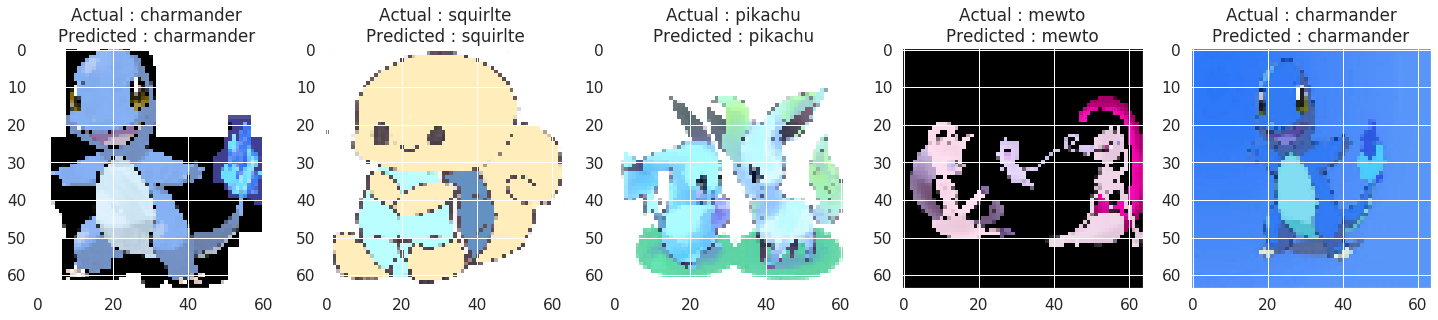

In [273]:
plt.figure(figsize=(25,5))
shuffle(correctly_classified_indices)
for plot_index, good_index in enumerate(random.sample(correctly_classified_indices,5)):
    plt.subplot(1, 5, plot_index + 1)
    plt.imshow(testX[good_index])
    plt.title('Actual : ' + labels_index[testY.argmax(axis=1)[good_index]] + '\nPredicted : ' + labels_index[nn_pred[good_index]])

## MisClassified Images

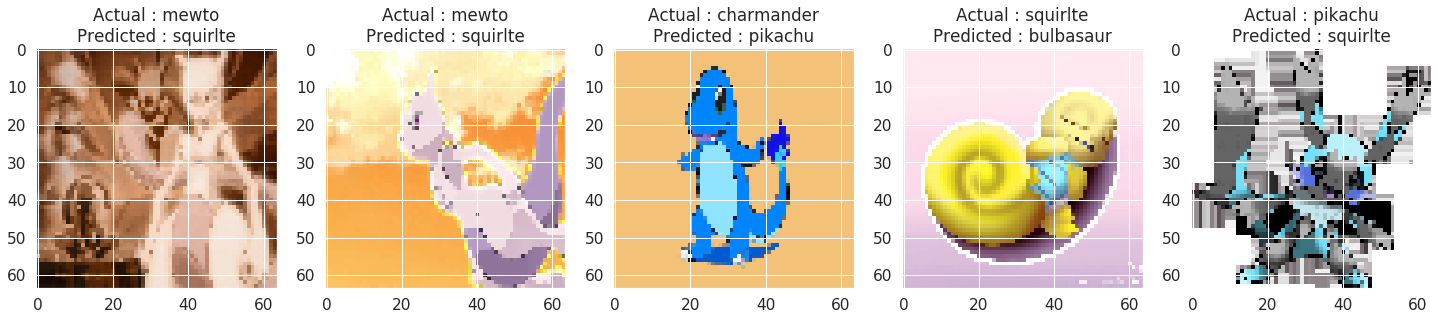

In [271]:
plt.figure(figsize=(25,5))
shuffle(misclassified_indices)
for plot_index, bad_index in enumerate(misclassified_indices[0:5]):
    plt.subplot(1, 5, plot_index + 1)
    plt.imshow(testX[bad_index])
    plt.title('Actual : ' + labels_index[testY.argmax(axis=1)[bad_index]] + '\nPredicted : ' + labels_index[nn_pred[bad_index]])

In [202]:
def pretty_cm(predY, testY, labels):
    cm = confusion_matrix(predY.argmax(axis=1), testY.argmax(axis=1))
    ax= plt.subplot()
#     ax = plt.subplot(figsize=(15,10))
    sn.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'BuGn_r')
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('Actual label')
    ax.set_title('Accuracy: {0}'.format(accuracy_score(testY.argmax(axis=1), predY.argmax(axis=1))), size = 15) 
    ax.xaxis.set_ticklabels(labels , rotation = '90')
    ax.yaxis.set_ticklabels(labels , rotation = '0')

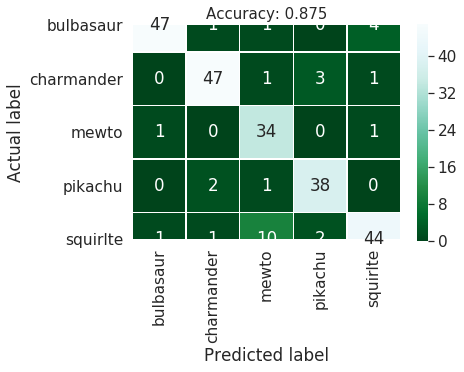

In [277]:
pretty_cm(predY,testY,labels_index.values())

## Save Observations

In [24]:
# out = open('./observations/observation.csv' , 'a')
observation_list = [EPOCHS,INIT_LR,BS, H.history['loss'][-1], H.history['val_loss'][-1], H.history['acc'][-1], H.history['val_acc'][-1]]
observation_list
with open('./observations/observation.csv', 'a') as file_out:
    file_out.write(str(observation_list) + '\n')
# out.write(EPOCHS + ',' + INIT_LR + ',' + BS + ',' + H.history['loss'][-1] + ',' + H.history['val_loss'][-1] + ',' + H.history['acc'][-1] + ',' + H.history['val_acc'][-1] + '\n')
# out.write(str(observation_list))

## Plot Results

In [25]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (SmallVGGNet)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('symnet_results.png')

print("[INFO] serializing network and label binarizer...")
model.save('symnet.model')
f = open('labels.bin', "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] evaluating network...
              precision    recall  f1-score   support

   bulbasaur       0.96      0.96      0.96        53
  charmander       0.89      0.92      0.90        51
      mewtwo       0.94      0.96      0.95        52
     pikachu       0.86      0.94      0.90        47
    squirtle       0.90      0.74      0.81        38

    accuracy                           0.91       241
   macro avg       0.91      0.90      0.91       241
weighted avg       0.91      0.91      0.91       241

[INFO] serializing network and label binarizer...
